# Rare Labels

Categorical variables are those whose values are selected from a group of categories, also called labels. Labels may have different frequencies. Some categories appear a lot in the dataset, some others appear only in a small number of observations.

For example, in a dataset with information about loan applicants where one of the variables is "city" where the applicant lives, cities like "New York" may appear a lot in the data because New York has a huge population, whereas smaller towns like "Leavenworth" will appear only on a few occasions (population ~2000 people), because the population there is very small. A borrower is more likely to live in New York than in any other city because it has a bigger population.

Categorical variables may contain a few dominant labels that account for the majority of the observations and a large number of labels that appear only rarely.

### Is label frequency a problem?

Rare values can add a lot of information or none at all. For example, consider a stockholder meeting where each person can vote in proportion to their number of shares. One of the shareholders owns 50% of the stock, and the other 999 shareholders own the remaining 50%. The outcome of the vote is largely influenced by the shareholder who holds the majority of the stock. The remaining shareholders may have an impact collectively, but they have almost no impact individually.

The same occurs in real-life datasets. The label that is over-represented in the dataset tends to dominate the outcome, and those that are under-represented may have no impact individually, but could have an impact collectively.

More specifically,

- Rare categories can cause over-fitting, particularly in tree-based methods.
- Infrequent labels may add noise, which could cause over-fitting.
- Rare labels may be present only in training set, therefore causing over-fitting.
- Rare labels may appear only in the test set. Thus, the ML model will not know how to evaluate it.

**Note** Sometimes rare values, are indeed important. For example, if we are building a model to predict fraudulent loan applications, which are by nature rare, then a rare value in a certain variable, may be indeed very predictive. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we should not to ignore it.

We will:

- Learn to identify rare labels .
- Understand the impact of rare labels on the conclusions we derive from the data
- Understand how they may be distributed between training and testing sets.

We will use the House Sale Price dataset.


In [3]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
path = ('https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data')
od.download(path)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dajebbar
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████| 199k/199k [00:00<00:00, 974kB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [5]:
df_train = pd.read_csv('datas/train.csv')
df_test = pd.read_csv('datas/test.csv')

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
df_train.shape[0] + df_test.shape[0]

2919

In [10]:
df = pd.concat([df_train, df_test])

In [11]:
df.shape

(2919, 81)

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [13]:
df.to_csv('datas/houseprice.csv', index=False)

In [15]:
# Variable definitions:

# Neighborhood: Physical locations within Ames city limits
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)


use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']
df = pd.read_csv('datas/houseprice.csv', usecols=use_cols)
df.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500.0
1,Veenker,MetalSd,MetalSd,181500.0
2,CollgCr,VinylSd,VinylSd,223500.0
3,Crawfor,Wd Sdng,Wd Shng,140000.0
4,NoRidge,VinylSd,VinylSd,250000.0


In [19]:
# Let's look at the different number of labels
# in each variable (cardinality).

# These are the categorical variables.
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']
for col in cat_cols:
    print(f"{col}: {df[col].nunique(dropna=False)}")

Neighborhood: 25
Exterior1st: 16
Exterior2nd: 17


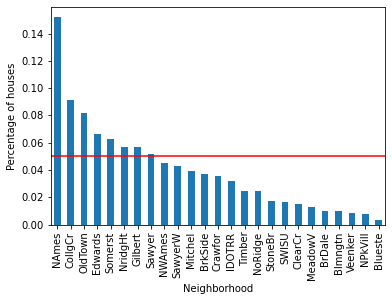

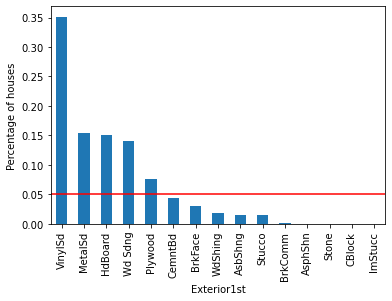

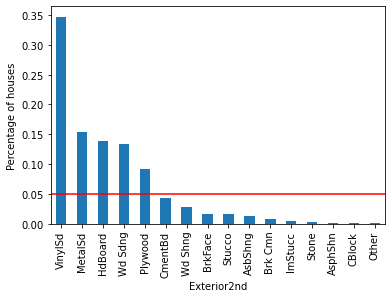

In [21]:
# Let's plot the category frequency.
# That is, the percentage of houses with each label.
for col in cat_cols:
    temp_df = pd.Series(df[col].value_counts() / df.shape[0])

    # Make plot with these percentages.
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Add a line at 5 % to flag the threshold for rare categories.
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show();

Some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or Rare Values and could cause over-fitting.